In [1]:
from phages import *
from phagesvisual import *

## Competetive Phage simulation Single Run

#### No Cross-Imunity

Phage A survived Untill: 425 Phage B survived Untill: 1000


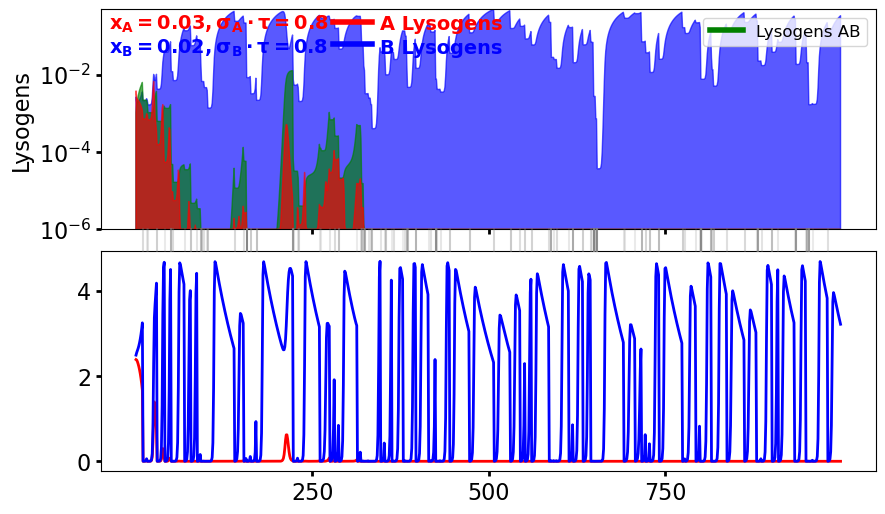

In [23]:
## Parameters
##Environment
p = 0.1                                # Bad Events
tbad = 10 ** 3                         # Average durations, exponentially distributed
omega = 5                              # Multiplicative Return
xa, sa = 0.03, 0.8 * 10 ** (-3)        # Phage A; lysogeny rate, prophage stability
xb, sb = 0.02, 0.8 * 10 ** (-3)        # Phage B; lysogeny rate, prophage stability

cutoff = 10 ** (-12)                   # Inverse of system size; Makes sence when looking at population chart
iterations = 10 ** 3                   # Simulation duration
seed = np.random.rand(iterations)      # Generetating event sequence randomly

## Calling Simulation from Liberary
ha0, hb0, hab0, hfa0, hfb0, tbad_list0, a_death0, b_death0 = simo(xa, sa, xb, sb, p, omega, tbad, seed, cutoff)

## Printing the death of phages, if they survive, they get same number out as iteraitons
print("Phage A survived Untill:", a_death0,"Phage B survived Untill:", b_death0)

plot_2(ha0, hb0, hab0, hfa0, hfb0, omega, p, tbad_list0, xa, sa, xb, sb, scale=1,y_cutoff=6, seed=seed)

### Following Death Trajectory of loosing phage

Simulation Event that phage died: 445


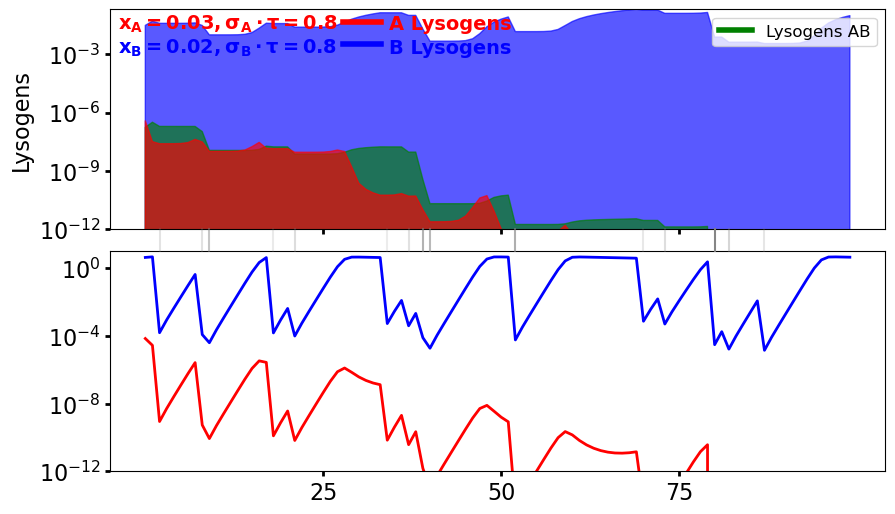

In [29]:
## Plotting points 100 events before extinction, and showing 20 iterations after extinction
a = min(a_death0, b_death0) + 20    
b = a - 100
print("Simulation Event that phage died:",a)

## Using Plotting Function
plot_2(ha0[b:a], hb0[b:a], hab0[b:a], hfa0[b:a], hfb0[b:a], omega, p, tbad_list0[b:a], xa, sa, xb, sb, scale=2,y_cutoff=12, seed=seed[b:a])

### Death Times of first phage are exponential

Mean of min(a_death0, b_death0): 1079.5257
Variance of min(a_death0, b_death0): 2429733.3393


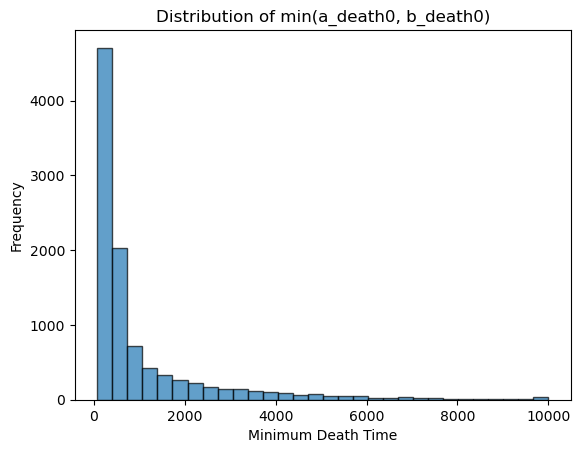

In [35]:
num_runs = 10 ** 4                  ## Simulating num_runs and saving first death
p = 0.1                             ## Probability to enter a bad period
t_bad= 10 ** 3                      ## Average duration of bad period
iterations = 10 ** 4

xa, sa = 0.06, 0.8 * 10 ** -3       ## Phage A parameters
xb, sb = 0.015, 0.8 * 10 ** -3       ## Phage B parameters

## Defining a small function tracking death times
@njit
def run_simulation(num_runs, iterations, xa, sa, xb, sb, p, omega, tbad, cutoff):
    death_times = np.empty(num_runs)
    
    for j in range(num_runs):
        seed = np.random.rand(iterations)
        _, _, _, _, _, _, a_death, b_death = simo(xa, sa, xb, sb, p, omega, tbad, seed, cutoff)
        death_times[j] = min(a_death, b_death)
    
    return death_times

# Run the simulation
death_times = run_simulation(num_runs, iterations, xa, sa, xb, sb, p, omega, tbad, cutoff)

# Compute mean and variance
mean_death_time = np.mean(death_times)
variance_death_time = np.var(death_times)

# Print results
print(f"Mean of min(a_death0, b_death0): {mean_death_time:.4f}")
print(f"Variance of min(a_death0, b_death0): {variance_death_time:.4f}")

# Plot the distribution
plt.hist(death_times, bins=30, edgecolor='black', alpha=0.7)
plt.xlabel('Minimum Death Time')
plt.ylabel('Frequency')
plt.title('Distribution of min(a_death0, b_death0)')
plt.show()

## Please note that if the phage is not dead, it counts as iterations length on charge, which could make the time distributions ill-looking sometimes.